In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


amir_deals = pd.read_csv('amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [38]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


In [39]:
amir_deals.groupby('product').size().reset_index(name='counts')

,product,counts
0,Product A,23
1,Product B,62
2,Product C,15
3,Product D,40
4,Product E,5
5,Product F,11
6,Product G,2
7,Product H,8
8,Product I,7
9,Product J,2


In [40]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [41]:
amir_deals['product'].value_counts(normalize=True)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: proportion, dtype: float64

In [42]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [43]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(n=5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


In [44]:
restaurant_groups = pd.DataFrame({'group_id': {0: 'A',
  1: 'B',
  2: 'C',
  3: 'D',
  4: 'E',
  5: 'F',
  6: 'G',
  7: 'H',
  8: 'I',
  9: 'J'},
 'group_size': {0: 2, 1: 4, 2: 6, 3: 2, 4: 2, 5: 2, 6: 3, 7: 2, 8: 4, 9: 2}})
restaurant_groups.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


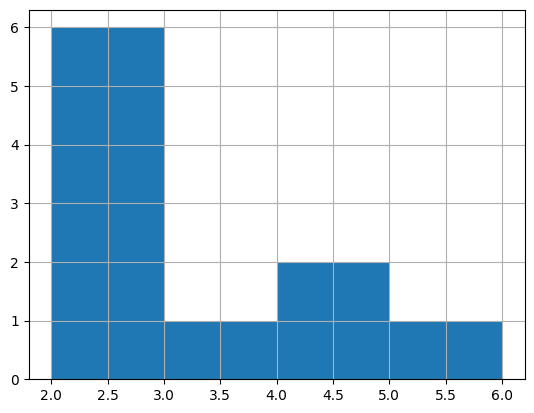

In [45]:
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

In [46]:
size_dist = restaurant_groups['group_size'] / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']


print(size_dist)

   group_size  prob
0           0   0.2
1           1   0.4
2           2   0.6
3           3   0.2
4           4   0.2
5           5   0.2
6           6   0.3
7           7   0.2
8           8   0.4
9           9   0.2


In [47]:
expected_value = (size_dist['group_size'] * size_dist['prob']).sum()
print(expected_value)

12.200000000000001


In [48]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]


# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.30000000000000004


In [49]:
min_time = 0
max_time = 30
# Import uniform from scipy.stats
from scipy.stats import uniform


# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)


# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

0.16666666666666666
0.8333333333333334


In [50]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)

0.3333333333333333


[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677]


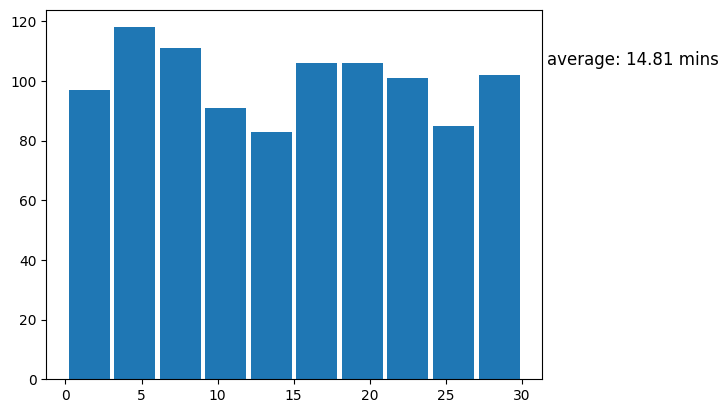

In [36]:
np.random.seed(334)
# Import uniform
from scipy.stats import uniform


# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)
print(wait_times[:30])

# Create a histogram of simulated times and show plot
plt.hist(wait_times, rwidth=0.9)
plt.text(1.01, 0.85, f'average: {np.mean(wait_times):.2f} mins',
fontsize=12, transform=plt.gca().transAxes)


plt.show()

In [54]:
from scipy.stats import binom
# Set random seed to 10
np.random.seed(10)


# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

[1]


In [55]:

np.random.seed(10)
# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))



[1]


In [56]:

np.random.seed(10)
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)


# Print mean deals won per week
print(np.mean(deals))

0.8269230769230769


In [57]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.027


In [58]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.784


In [60]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)


print(prob_greater_than_1)


0.21599999999999997


In [61]:
won_30pct = 0.3 * 3
print(won_30pct)
# Expected number won with 25% win rate
won_25pct = 0.25 * 3
print(won_25pct)


# Expected number won with 35% win rate
won_35pct = 0.35 * 3
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998
